# Analysis

In [34]:
using AlgebraOfGraphics,
    CairoMakie
using DataFrames,
    DataFramesMeta,
    CategoricalArrays
using Arrow
using Statistics
import JSON

In [36]:
dim = 3
dir = "01_oblique_linear_alfven/dim_$(dim)_beta_0.25_theta_60"

# load simulation metadata (json)
meta = JSON.parsefile("$(dir)/sim_parameters.json")


Dict{String, Any} with 44 entries:
  "diag_field"  => true
  "w_pi"        => 56414.6
  "Lz_norm"     => 256
  "dt"          => 0.00446548
  "Lx_norm"     => 16
  "m_ion_norm"  => 100
  "nz"          => 128
  "Te"          => 61.4707
  "wave_number" => 4
  "dz_norm"     => 2.0
  "vA_over_c"   => 0.0031022
  "Lz"          => 1.36041e6
  "nppc"        => 512
  "dz"          => 10628.2
  "k"           => 1.84744e-5
  "m_ion"       => 9.10938e-29
  "diag_format" => "plotfile"
  "dim"         => 3
  "nx"          => 8
  ⋮             => ⋮

In [42]:
meta["t_ci"]
meta["d_i"]

5314.093261582036

In [23]:
file = "data.arrow"
path = joinpath(dir, file)
df = path |> Arrow.Table |> DataFrame

Row,Bx,By,Bz,Ex,Ey,Ez,jx,jy,jz,x,y,z,time,__index_level_0__
,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Int64?
1,8.66025e-8,4.97592e-8,5.0e-8,0.0,0.0,0.0,0.0,0.0,0.0,-37198.7,-37198.7,5314.09,0.0,0
2,8.66025e-8,4.7847e-8,5.0e-8,0.0,0.0,0.0,0.0,0.0,0.0,-37198.7,-37198.7,15942.3,0.0,1
3,8.66025e-8,4.40961e-8,5.0e-8,0.0,0.0,0.0,0.0,0.0,0.0,-37198.7,-37198.7,26570.5,0.0,2
4,8.66025e-8,3.86505e-8,5.0e-8,0.0,0.0,0.0,0.0,0.0,0.0,-37198.7,-37198.7,37198.7,0.0,3
5,8.66025e-8,3.17197e-8,5.0e-8,0.0,0.0,0.0,0.0,0.0,0.0,-37198.7,-37198.7,47826.8,0.0,4
6,8.66025e-8,2.35698e-8,5.0e-8,0.0,0.0,0.0,0.0,0.0,0.0,-37198.7,-37198.7,58455.0,0.0,5
7,8.66025e-8,1.45142e-8,5.0e-8,0.0,0.0,0.0,0.0,0.0,0.0,-37198.7,-37198.7,69083.2,0.0,6
8,8.66025e-8,4.90086e-9,5.0e-8,0.0,0.0,0.0,0.0,0.0,0.0,-37198.7,-37198.7,79711.4,0.0,7
9,8.66025e-8,-4.90086e-9,5.0e-8,0.0,0.0,0.0,0.0,0.0,0.0,-37198.7,-37198.7,90339.6,0.0,8


In [24]:
B_fields = names(df, r"B")
E_field = names(df, r"E")
j_field = names(df, r"j")

variables = [B_fields; E_field; j_field]

9-element Vector{String}:
 "Bx"
 "By"
 "Bz"
 "Ex"
 "Ey"
 "Ez"
 "jx"
 "jy"
 "jz"

In [26]:
# calculate the mean of the data by averaging over "y" and "z"
ids = [:z, :time]

function plot_fields(df, fields; ids=ids)
    temp_df = @chain df begin
        groupby(ids)
        combine(fields .=> mean, renamecols=false)
        stack(fields, ids)
    end

    plt = data(temp_df) * mapping(ids..., :value, row = :variable) * visual(Heatmap)
    draw(plt)
end

plot_fields (generic function with 1 method)

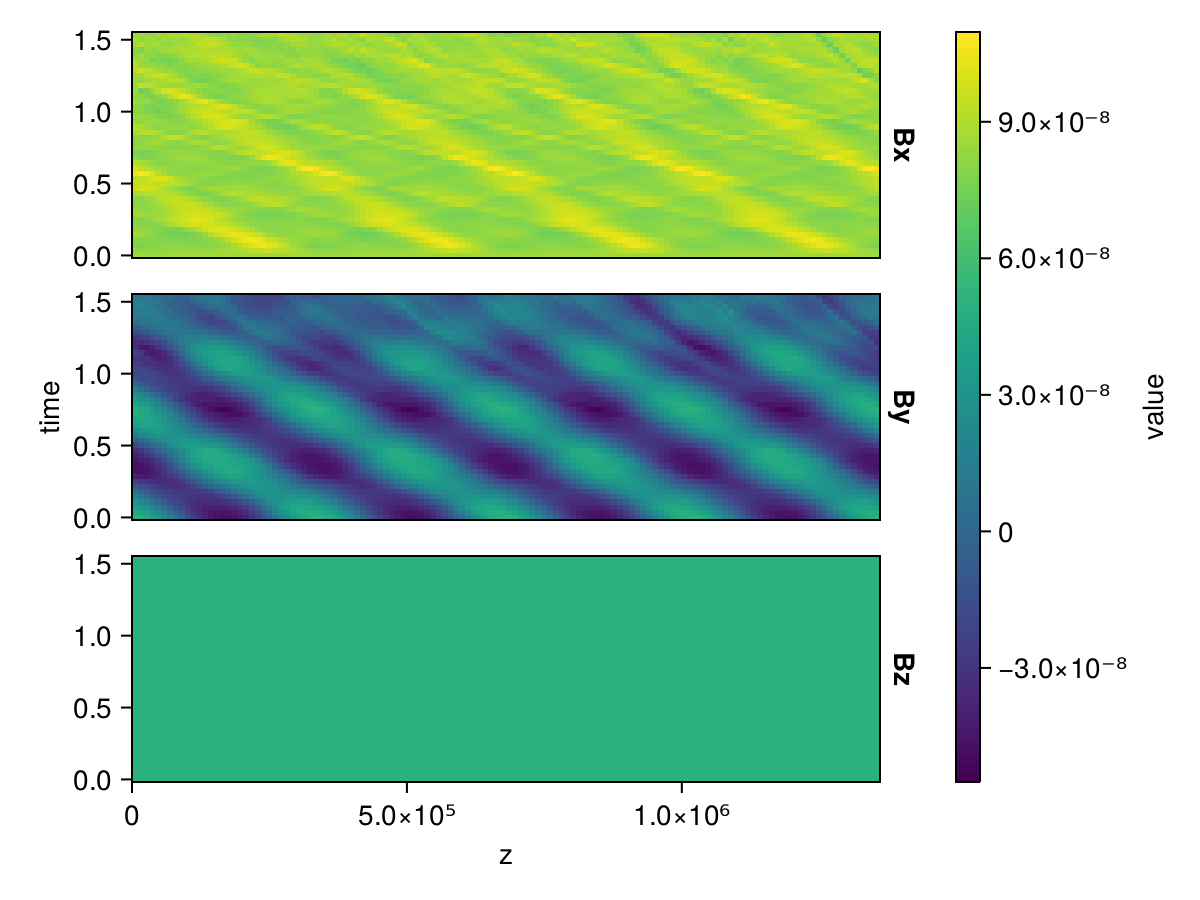

In [27]:
plot_fields(df, B_fields)

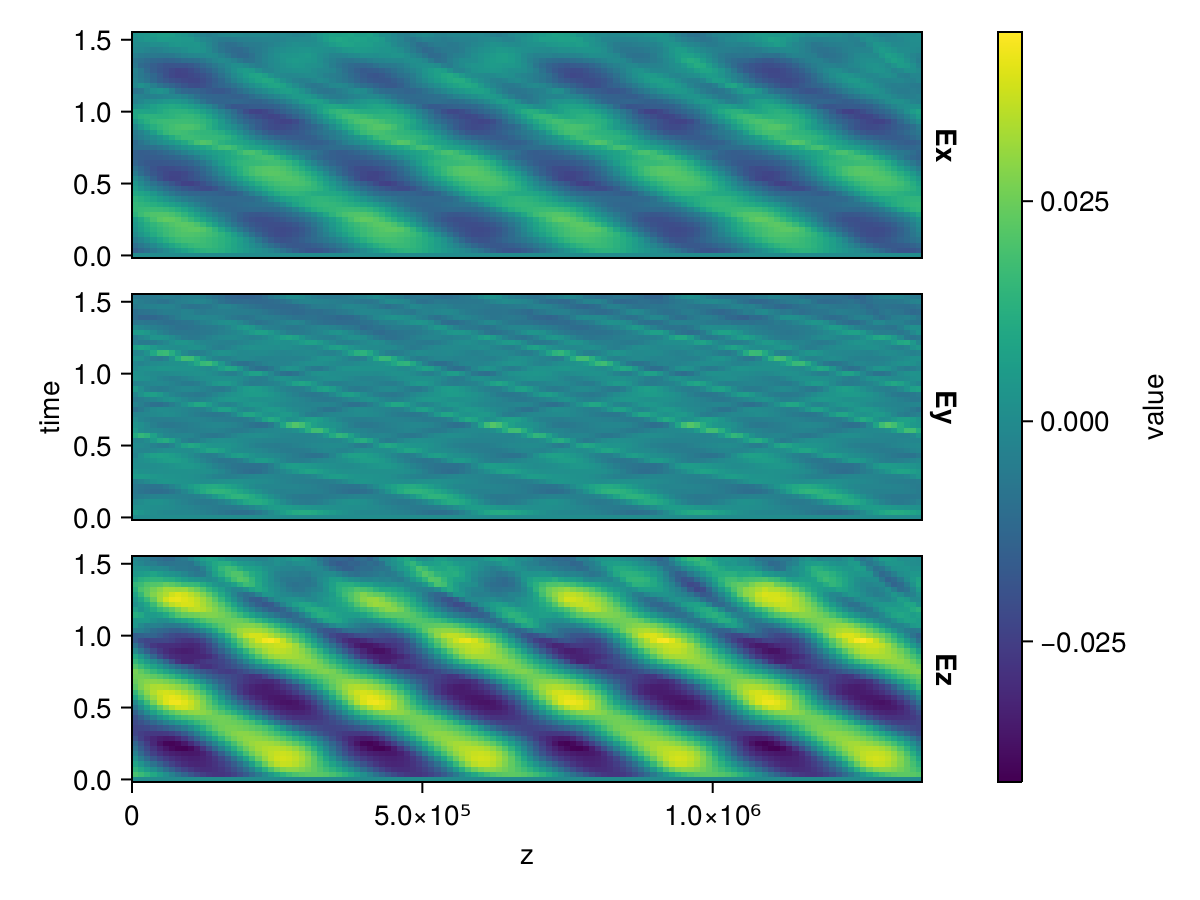

In [28]:
plot_fields(df, E_field)

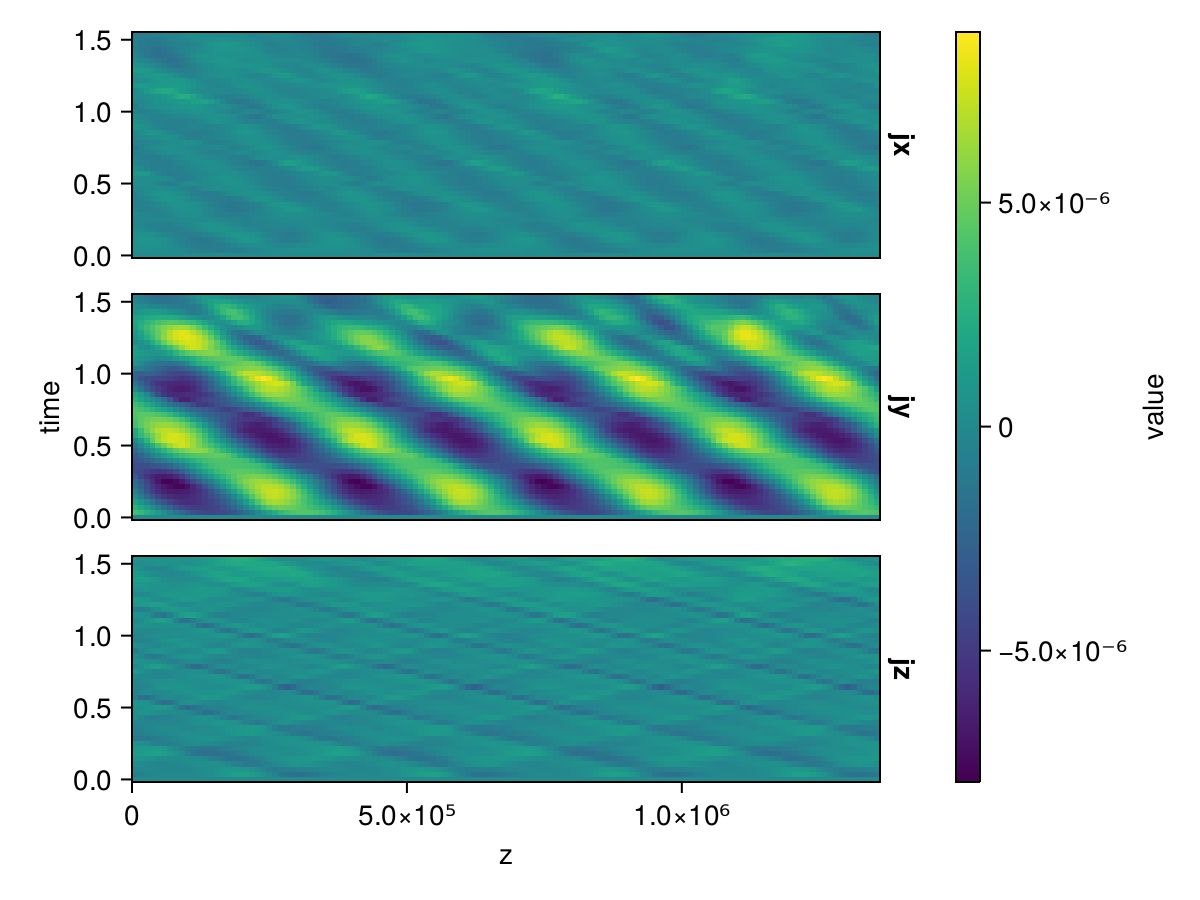

In [29]:
plot_fields(df, j_field)

## Fluid fields

In [30]:
file = "particle.arrow"
path = joinpath(dir, file)
df = path |> Arrow.Table |> DataFrame

Row,particle_position_z,particle_momentum_y,time,__index_level_0__
,Float64?,Float64?,Float64?,Int64?
1,1361.73,2.68171e-23,0.0,0
2,2439.99,-2.12413e-23,0.0,1
3,9193.6,1.83426e-23,0.0,2
4,2099.61,6.25404e-23,0.0,3
5,4741.6,2.26147e-23,0.0,4
6,10166.2,2.22307e-23,0.0,5
7,1487.59,1.73586e-23,0.0,6
8,6068.79,6.14796e-23,0.0,7
9,9367.07,4.3003e-24,0.0,8


In [44]:
df.z_norm = df.particle_position_z / meta["d_i"]
df.py_norm = df.particle_momentum_y / 1e-25

226492416-element Vector{Float64}:
  268.1711124573411
 -212.41275002261375
  183.42604391164087
  625.4040352925394
  226.14742113908036
  222.30727072338098
  173.58602915998517
  614.7961373786759
   43.002972521130644
  218.46257621720136
    ⋮
 -746.5462403962405
 -271.23447418955226
  594.043219263116
  159.94894555190038
  391.5216869275948
  330.20762116750456
  -53.8838611467182
 -216.43597886428884
  400.8417260423312

┌ Warning: No strict ticks found
└ @ PlotUtils /Users/zijin/.julia/packages/PlotUtils/jEGKP/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/zijin/.julia/packages/PlotUtils/jEGKP/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/zijin/.julia/packages/PlotUtils/jEGKP/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/zijin/.julia/packages/PlotUtils/jEGKP/src/ticks.jl:191


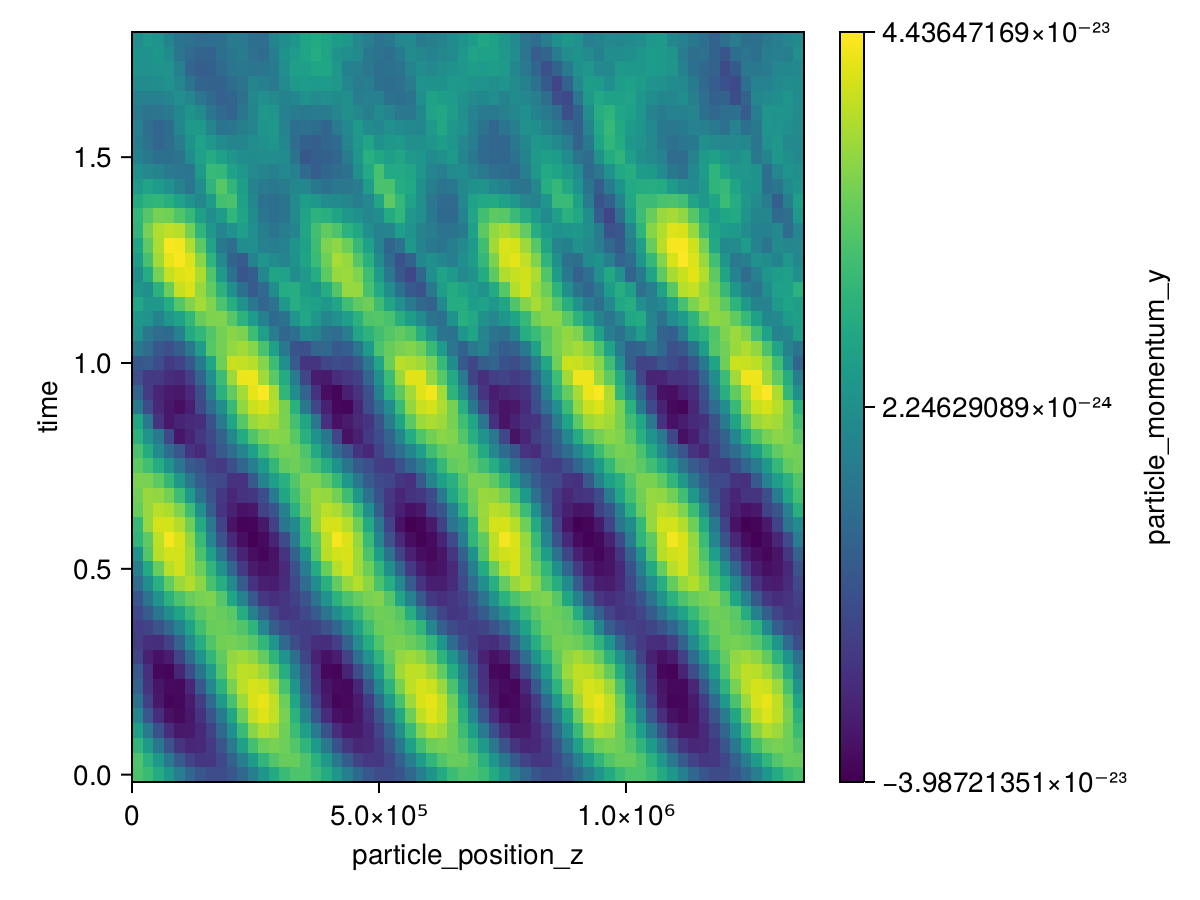

In [20]:
plt = data(df) * mapping(:particle_position_z, :time,:particle_momentum_y) * visual(Heatmap)
draw(plt)

### Non-binned particle data

In [45]:
using CategoricalArrays

In [54]:
df.time_norm = CategoricalArray(df.time ./ meta["t_ci"])

226492416-element CategoricalArray{Float64,1,UInt32}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 53.0
 53.0
 53.0
 53.0
 53.0
 53.0
 53.0
 53.0
 53.0

In [46]:
z_norm_edge = 0:1:240
py_norm_edge = -1e3:10:1e3

-1000.0:10.0:1000.0

In [57]:
datalimits_f = x -> quantile(x, [0.05, 0.95])

#11 (generic function with 1 method)

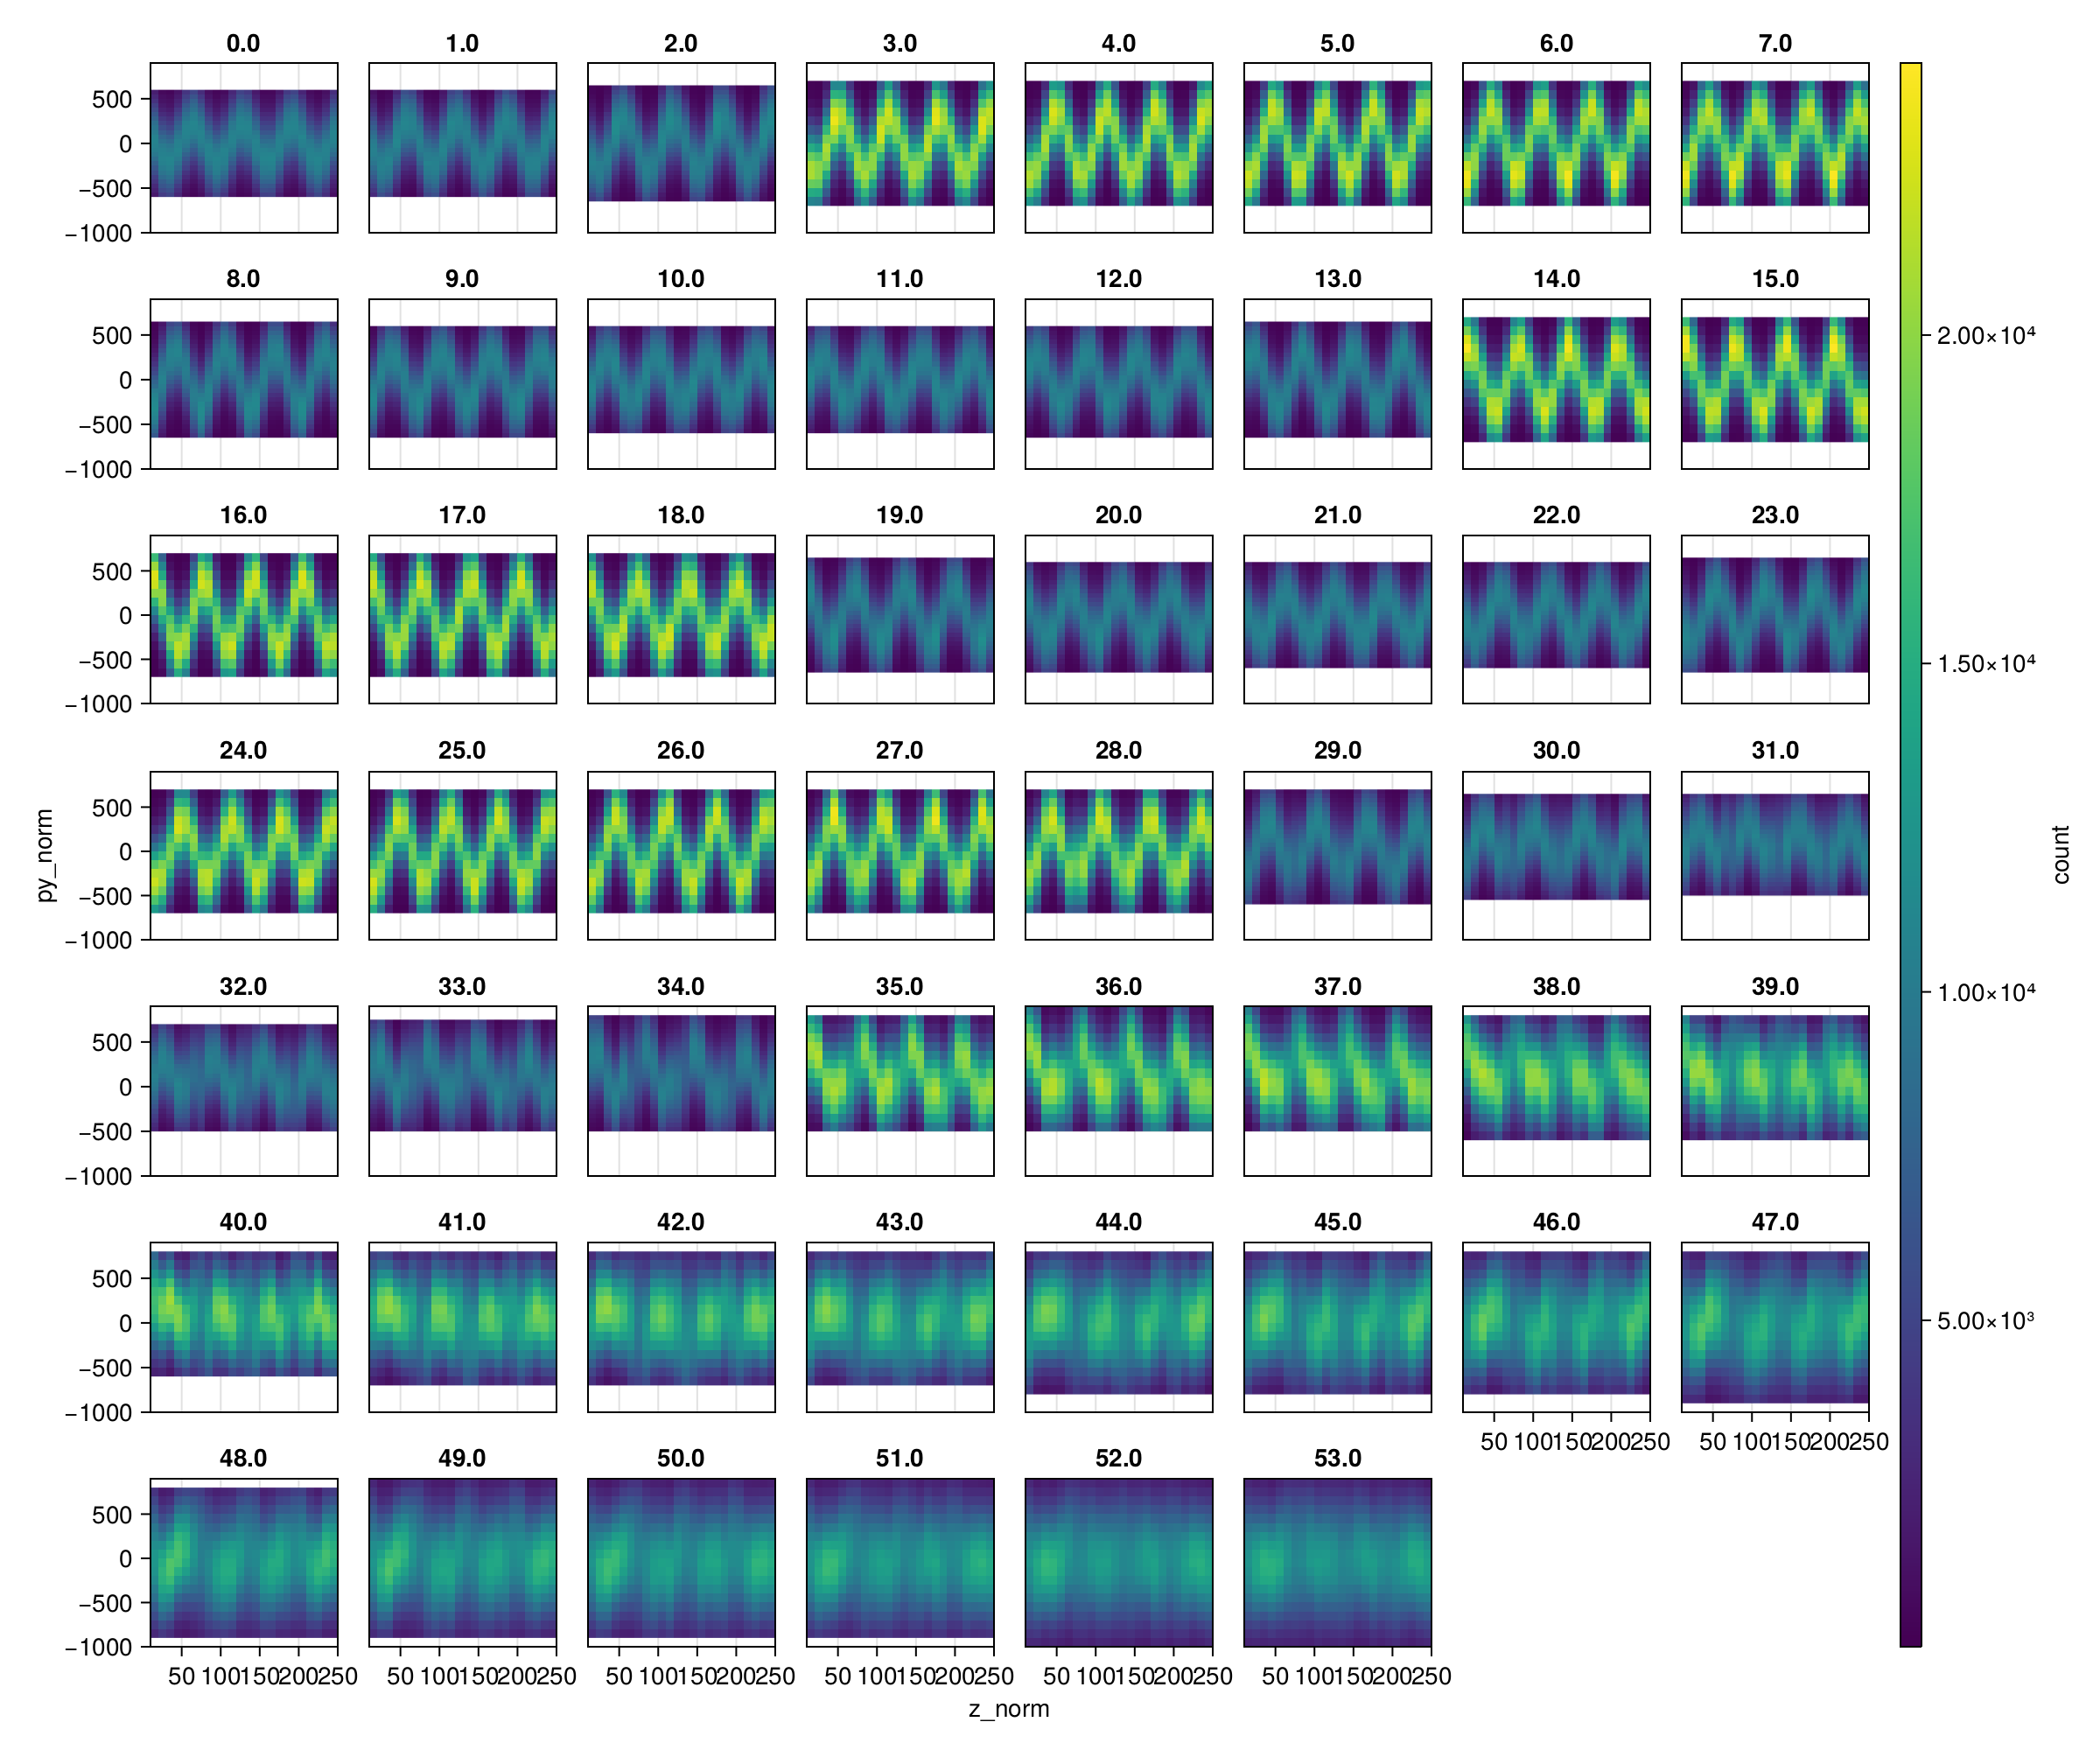

In [58]:
fig_options = (size = (1200, 1000),)

plt = data(df) * mapping(:z_norm, :py_norm, layout=:time_norm) * histogram(datalimits=datalimits_f)
p = draw(plt; figure = fig_options)

## Parameters

In [3]:
using Pkg
Pkg.add("Symbolics")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [ ]:
using Symbolics

In [12]:
@variables t x y μ_0 B ρ c n q m ϵ_0

Alfven_speed = B / sqrt(μ_0 * ρ)

# plasma frequency
ω_p = sqrt(n * q / (m * ϵ_0))
# inertial_length
d_i = c / ω_p

# gryofrequency
ω_c = q * B / m


simplify(ω_c / ω_p)

(B*q) / (m*sqrt((n*q) / (m*ϵ_0)))

In [13]:
ω_c / ω_p

(B*q) / (m*sqrt((n*q) / (m*ϵ_0)))